<a href="https://colab.research.google.com/github/nchebet09/Test/blob/main/Copy_of_Akeed_Train_and_Test_File_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation System (Online Food Delivery)

### a. Specifying the data analysis question.

Build a recommendation engine to predict what restaurants customers are most likely to order from given the customer location, restaurant information, and the customer order history

### b. Defining the metric of success






### c. Understanding the context



### d. Recording the experimental design













## 1. Loading the Data

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load the train customers data set
train_customers = pd.read_csv('/content/train_customers.csv')
train_customers.head()

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16
1,ZGFSYCZ,Male,NaN,1,1,EN,09/02/2018 12:04,09/02/2018 12:04
2,S2ALZFL,Male,NaN,0,1,EN,14/03/2018 18:31,14/03/2018 18:31
3,952DBJQ,Male,NaN,1,1,EN,15/03/2018 19:47,15/03/2018 19:47
4,1IX6FXS,Male,NaN,1,1,EN,15/03/2018 19:57,15/03/2018 19:57


In [ ]:
# load train locations data set
train_locations = pd.read_csv('/content/train_locations.csv')
train_locations.head()

,customer_id,location_number,location_type,latitude,longitude
0,02SFNJH,0,NaN,1.682392,-78.789737
1,02SFNJH,1,NaN,1.679137,0.766823
2,02SFNJH,2,NaN,-0.498648,0.661241
3,RU43CXC,0,Home,0.100853,0.438165
4,BDFBPRD,0,NaN,2.523125,0.733464


In [ ]:
# load the test customers data set
# test_customers = pd.read_csv('/content/test_customers.csv')
# test_customers.head()

In [ ]:
# load test locations data set
# test_locations = pd.read_csv('/content/test_locations.csv')
# test_locations.head()

In [ ]:
# load the orders data set
orders = pd.read_csv('/content/orders.csv')
orders.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,16,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,delivery_time,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/07/2019 05:30,105,01/08/2019 05:30,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/07/2019 05:30,294,01/08/2019 05:31,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/07/2019 05:30,83,01/08/2019 05:31,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,NaN,0,0.0,NaN,01/08/2019 04:03,NaN,NaN,NaN,NaN,NaN,31/07/2019 05:30,90,01/08/2019 05:34,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31/07/2019 05:30,83,01/08/2019 05:35,0,Work,BAL0RVT X 0 X 83


In [ ]:
# load the vendors data set
vendors = pd.read_csv('/content/vendors.csv')
vendors.head()

,id,authentication_id,latitude,longitude,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status,verified,rank,language,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at,updated_at,device_type,display_orders
0,4,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,-,15,0.0,Yes,0,1,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1,1,30/01/2018 14:42,07/04/2020 15:12,3,1
1,13,118608,-0.471654,0.744470,Restaurants,2,0.7,5,1,08:30AM-10:30PM,-,14,0.0,Yes,0,1,1,11,EN,4.7,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1,1,03/05/2018 12:32,05/04/2020 20:46,3,1
2,20,118616,-0.407527,0.643681,Restaurants,2,0.0,8,1,08:00AM-10:45PM,-,19,0.0,Yes,0,1,1,1,EN,4.5,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,"{""primary_tags"":""71""}",1,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1,1,04/05/2018 22:28,07/04/2020 16:35,3,1
3,23,118619,-0.585385,0.753811,Restaurants,2,0.0,5,1,10:59AM-10:30PM,-,16,0.0,Yes,0,1,1,11,EN,4.5,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,"{""primary_tags"":""46""}",1,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1,1,06/05/2018 19:20,02/04/2020 00:56,3,1
4,28,118624,0.480602,0.552850,Restaurants,2,0.7,15,1,11:00AM-11:45PM,-,10,0.0,Yes,0,1,1,11,EN,4.4,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,"{""primary_tags"":""32""}",1,5,Burgers,Y,1,1,17/05/2018 22:12,05/04/2020 15:57,3,1


In [ ]:
# load the sample submission data set
# sample_submission = pd.read_csv('/content/SampleSubmission.csv')
# sample_submission.head()

## 2. Exploring the Data

**Project Tips:** 

For preparing test data, the hint is in sample submission. Drop duplicates for test customers. Merge test customer and location and then, for each row of test add all rows of vendors. Then create the id column using the three columns mentioned in the name of sample submission id. Try to make the number of rows in the test similar to sample submission.

Follow the same steps for the train. This should get you started.

### Prepare the train set

In [ ]:
# check dimensions of different files
# ls = [train_customers, train_locations, test_customers, test_locations, vendors, orders]
ls = [train_customers, train_locations,vendors, orders]
# ls_str = ['train_customers', 'train_locations', 'test_customers', 'test_locations', 'vendors', 'orders']
ls_str = ['train_customers', 'train_locations',  'vendors', 'orders']
a = 0
for i in ls_str:
  print({i:ls[a].shape})
  a += 1

{'train_customers': (34674, 8)}
{'train_locations': (59503, 5)}
{'vendors': (100, 59)}
{'orders': (135303, 26)}


In [ ]:
# check for duplicates in train customers
train_duplicates = train_customers[train_customers.iloc[:,0].duplicated()]
train_customers = train_customers.drop(train_duplicates.index)
print('Duplicates train ids:', train_duplicates.shape[0])
print('New shape:', train_customers.shape)

Duplicates train ids: 151
New shape: (34523, 8)


In [ ]:
# check for duplicates in test customers
# test_duplicates = test_customers[test_customers.iloc[:,0].duplicated()]
# test_customers = test_customers.drop(test_duplicates.index)
# print('Duplicates test ids:', test_duplicates.shape[0])
# print('New shape:', test_customers.shape)

In [ ]:
# merge train customers and locations
train_customer_locations = pd.merge(train_customers, train_locations, left_on='akeed_customer_id', right_on='customer_id', how='inner')
print(train_customer_locations.shape)
train_customer_locations.head(5)

(58024, 13)


,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at,customer_id,location_number,location_type,latitude,longitude
0,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.407538,-67.197291
1,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,1,Home,-96.645619,-67.169154
2,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,2,NaN,-0.128673,-78.575702
3,ZGFSYCZ,Male,NaN,1,1,EN,09/02/2018 12:04,09/02/2018 12:04,ZGFSYCZ,0,Home,-0.175558,-78.570161
4,ZGFSYCZ,Male,NaN,1,1,EN,09/02/2018 12:04,09/02/2018 12:04,ZGFSYCZ,1,Home,0.191105,-78.613494


In [ ]:
# preview last five rows
# train_customer_locations.tail(5)

In [ ]:
# merge train customers and locations
# test_customer_locations = pd.merge(test_customers, test_locations, left_on='akeed_customer_id', right_on='customer_id', how='inner')
# test_customer_locations.shape
# test_customer_locations.head(5)

In [ ]:
# preview last five rows
# test_customer_locations.tail(5)

In [ ]:
# merge test customer locations and vendors table and create a cartesian product
#
train_clv = train_customer_locations.assign(key=1).merge(vendors.assign(key=1), on='key').drop('key',axis=1)
print(train_clv.shape)
train_clv.head(5)

(5802400, 72)


,akeed_customer_id,gender,dob,status_x,verified_x,language_x,created_at_x,updated_at_x,customer_id,location_number,location_type,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,language_y,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders
0,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.407538,-67.197291,4,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,-,15,0.0,Yes,0,1,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1,1,30/01/2018 14:42,07/04/2020 15:12,3,1
1,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.407538,-67.197291,13,118608,-0.471654,0.744470,Restaurants,2,0.7,5,1,08:30AM-10:30PM,-,14,0.0,Yes,0,1,1,11,EN,4.7,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1,1,03/05/2018 12:32,05/04/2020 20:46,3,1
2,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.407538,-67.197291,20,118616,-0.407527,0.643681,Restaurants,2,0.0,8,1,08:00AM-10:45PM,-,19,0.0,Yes,0,1,1,1,EN,4.5,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,"{""primary_tags"":""71""}",1,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1,1,04/05/2018 22:28,07/04/2020 16:35,3,1
3,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.407538,-67.197291,23,118619,-0.585385,0.753811,Restaurants,2,0.0,5,1,10:59AM-10:30PM,-,16,0.0,Yes,0,1,1,11,EN,4.5,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,"{""primary_tags"":""46""}",1,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1,1,06/05/2018 19:20,02/04/2020 00:56,3,1
4,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.407538,-67.197291,28,118624,0.480602,0.552850,Restaurants,2,0.7,15,1,11:00AM-11:45PM,-,10,0.0,Yes,0,1,1,11,EN,4.4,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,"{""primary_tags"":""32""}",1,5,Burgers,Y,1,1,17/05/2018 22:12,05/04/2020 15:57,3,1


In [ ]:
# create new columns for merging
#
train_clv['location_number_obj']=train_clv['location_number'].astype(str)
train_clv['id_obj']=train_clv['id'].astype(str)

# merge id, location number, and vendor id
#
train_clv['CID X LOC_NUM X VENDOR'] = train_clv['customer_id'] +' X '+ train_clv['location_number_obj'] +' X '+ train_clv['id_obj']
train_clv.head(2)

,akeed_customer_id,gender,dob,status_x,verified_x,language_x,created_at_x,updated_at_x,customer_id,location_number,location_type,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,language_y,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR
0,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.407538,-67.197291,4,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,-,15,0.0,Yes,0,1,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1,1,30/01/2018 14:42,07/04/2020 15:12,3,1,0,4,TCHWPBT X 0 X 4
1,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.407538,-67.197291,13,118608,-0.471654,0.744470,Restaurants,2,0.7,5,1,08:30AM-10:30PM,-,14,0.0,Yes,0,1,1,11,EN,4.7,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1,1,03/05/2018 12:32,05/04/2020 20:46,3,1,0,13,TCHWPBT X 0 X 13


In [ ]:
# create target column
#
all_services = orders['CID X LOC_NUM X VENDOR'].values.tolist()
train_clv['target'] = train_clv['CID X LOC_NUM X VENDOR'].isin(all_services).astype(int).values
train_clv.head(2)

,akeed_customer_id,gender,dob,status_x,verified_x,language_x,created_at_x,updated_at_x,customer_id,location_number,location_type,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,language_y,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.407538,-67.197291,4,118597,-0.588596,0.754434,Restaurants,2,0.0,6,1,11:00AM-11:30PM,-,15,0.0,Yes,0,1,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1,1,30/01/2018 14:42,07/04/2020 15:12,3,1,0,4,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.407538,-67.197291,13,118608,-0.471654,0.744470,Restaurants,2,0.7,5,1,08:30AM-10:30PM,-,14,0.0,Yes,0,1,1,11,EN,4.7,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1,1,03/05/2018 12:32,05/04/2020 20:46,3,1,0,13,TCHWPBT X 0 X 13,0


In [ ]:
## Reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
# reduce train memory usage
train_clv = reduce_mem_usage(train_clv, verbose=1)

Mem. usage decreased to 2429.25 Mb (28.7% reduction)


In [ ]:
# from google.colab import files
# train_clv.to_csv('merged_train.csv')
# files.download('merged_train.csv')

In [ ]:
# set the max row display  (500)
pd.set_option('display.max_rows', 500)

In [ ]:
# making a copy of train_clv
train = train_clv

In [ ]:
# Previewing the head
train.head(2)

,akeed_customer_id,gender,dob,status_x,verified_x,language_x,created_at_x,updated_at_x,customer_id,location_number,location_type,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,language_y,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.4375,-67.1875,4,118597,-0.588379,0.754395,Restaurants,2,0.000000,6,1,11:00AM-11:30PM,-,15,0.0,Yes,0,1,1,11,EN,4.398438,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1,1,30/01/2018 14:42,07/04/2020 15:12,3,1,0,4,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,NaN,1,1,EN,07/02/2018 19:16,07/02/2018 19:16,TCHWPBT,0,Work,-96.4375,-67.1875,13,118608,-0.471680,0.744629,Restaurants,2,0.700195,5,1,08:30AM-10:30PM,-,14,0.0,Yes,0,1,1,11,EN,4.699219,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1,1,03/05/2018 12:32,05/04/2020 20:46,3,1,0,13,TCHWPBT X 0 X 13,0


In [ ]:
# check the shape of the data
print('Train shape:', train.shape)
# print('Test shape:', test.shape)

Train shape: (5802400, 76)


In [ ]:
d_types = pd.DataFrame(train.dtypes).reset_index()
d_types.columns = [['column', 'type']]
d_types.iloc[:,1].value_counts()

object     49
int8       17
float16     8
int16       1
int32       1
Name: (type,), dtype: int64

In [ ]:
# check train column names
train.columns

Index(['akeed_customer_id', 'gender', 'dob', 'status_x', 'verified_x',
       'language_x', 'created_at_x', 'updated_at_x', 'customer_id',
       'location_number', 'location_type', 'latitude_x', 'longitude_x', 'id',
       'authentication_id', 'latitude_y', 'longitude_y', 'vendor_category_en',
       'vendor_category_id', 'delivery_charge', 'serving_distance', 'is_open',
       'OpeningTime', 'OpeningTime2', 'prepration_time', 'commission',
       'is_akeed_delivering', 'discount_percentage', 'status_y', 'verified_y',
       'rank', 'language_y', 'vendor_rating', 'sunday_from_time1',
       'sunday_to_time1', 'sunday_from_time2', 'sunday_to_time2',
       'monday_from_time1', 'monday_to_time1', 'monday_from_time2',
       'monday_to_time2', 'tuesday_from_time1', 'tuesday_to_time1',
       'tuesday_from_time2', 'tuesday_to_time2', 'wednesday_from_time1',
       'wednesday_to_time1', 'wednesday_from_time2', 'wednesday_to_time2',
       'thursday_from_time1', 'thursday_to_time1', 'thursd

## Data Cleaning


In [ ]:
# check missing data
train.isnull().values.any()

True

In [ ]:
# checking the percentage of missing values in each column
pd.DataFrame(train.isnull().mean() * 100).reset_index()

,index,0
0,akeed_customer_id,0.000000
1,gender,29.386116
2,dob,91.046808
3,status_x,0.000000
4,verified_x,0.000000
5,language_x,26.850958
6,created_at_x,0.000000
7,updated_at_x,0.000000
8,customer_id,0.000000
9,location_number,0.000000


In [ ]:
# drop time1 and time2 
cols = range(33, 67)

train.drop(train.columns[[cols]], axis=1, inplace=True)
train.drop(train.columns[[2,10]], axis=1, inplace=True)
train.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:4107: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


(5802400, 40)

In [ ]:
# check % of null values
pd.DataFrame(train.isnull().mean() * 100).reset_index()

,index,0
0,akeed_customer_id,0.000000
1,gender,29.386116
2,status_x,0.000000
3,verified_x,0.000000
4,language_x,26.850958
5,created_at_x,0.000000
6,updated_at_x,0.000000
7,customer_id,0.000000
8,location_number,0.000000
9,latitude_x,0.010341


In [ ]:
# check unique values
print(train['language_x'].value_counts())
print(train['language_y'].value_counts())
print(train['commission'].value_counts())

EN    4244400
Name: language_x, dtype: int64
EN    4932040
Name: language_y, dtype: int64
0.0    4932040
Name: commission, dtype: int64


In [ ]:
# drop commission, language_x and language_y. Also dropped duplicated rows customer_id, id_obj and location number_obj

train.drop(train.columns[[4,7,23,29,36,37]], axis=1, inplace=True)
train.shape

(5802400, 34)

In [ ]:
# check % of null values
pd.DataFrame(train.isnull().mean() * 100).reset_index()

,index,0
0,akeed_customer_id,0.000000
1,gender,29.386116
2,status_x,0.000000
3,verified_x,0.000000
4,created_at_x,0.000000
5,updated_at_x,0.000000
6,location_number,0.000000
7,latitude_x,0.010341
8,longitude_x,0.010341
9,id,0.000000


In [ ]:
# check unique values in gender
#
train['gender'].unique()

array(['Male', 'Female', 'Female  ', 'Female   ', 'Female    ', 'Male  ',
       '  ', 'Female ', nan, '?????', 'male'], dtype=object)

In [ ]:
# Replace values to male, female, and unknown
#
train['gender'] = train['gender'].replace(['Male', 'Male  ', 'male'], 'Male')
train['gender'] = train['gender'].replace(['Female', 'Female  ', 'Female   ', 'Female    ', 'Female '], 'Female')
train['gender'] = train['gender'].replace(['  ','?????'], 'Unknown')

# Filling null values Gender column
#
train['gender'] = train['gender'].fillna('Unknown')

# check_unique values
train['gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [ ]:
# check % of null values
# pd.DataFrame(train.isnull().mean() * 100).reset_index()

In [ ]:
# replace missing values with dash
#
train['OpeningTime'] = train['OpeningTime'].fillna('08:00AM-11:00PM')
train['OpeningTime2'] = train['OpeningTime2'].fillna('00:00AM-00:00AM')

train['OpeningTime'] = train['OpeningTime'].replace(['-'], '08:00AM-11:00PM')
train['OpeningTime2'] = train['OpeningTime2'].replace(['-',], '00:00AM-00:00AM')

# check % of null values
pd.DataFrame(train.isnull().mean() * 100).reset_index()

,index,0
0,akeed_customer_id,0.000000
1,gender,0.000000
2,status_x,0.000000
3,verified_x,0.000000
4,created_at_x,0.000000
5,updated_at_x,0.000000
6,location_number,0.000000
7,latitude_x,0.010341
8,longitude_x,0.010341
9,id,0.000000


In [ ]:
# check number of vendors is accurate
len(train['id'].unique())

100

In [ ]:
train['OpeningTime'].unique()

array(['11:00AM-11:30PM', '08:30AM-10:30PM', '08:00AM-10:45PM',
       '10:59AM-10:30PM', '11:00AM-11:45PM', '11:00AM-10:30PM',
       '09:00AM-11:30PM', '05:00PM-11:00PM', '08:00AM-11:30PM',
       '08:30AM-09:30PM', '11:00AM-11:00PM', '11:59AM-2:15 am',
       '08:00AM-12:30PM', '08:00AM-11:59PM', '10:00AM-11:45PM',
       '11:59AM-11:30PM', '08:30AM-11:45PM', '11:59AM-11:45PM',
       '11:00AM-10:45PM', '10:59AM-11:30PM', '11:15AM-10:00PM',
       '10:59AM-10:59PM', '09:59AM-11:45PM', '8:00AM-09:45PM',
       '04:00PM-11:45PM', '08:00AM-11:45PM', '11:15AM-10:30PM',
       '10:59AM-3:30PM', '11.30am-11:30PM', '11:00AM-11:59PM',
       '09:00AM-09:01AM', '11:59AM-10:45PM', '7:58AM-11:45PM',
       '09:00 AM-11:45 PM', '11:00AM-11:01PM', '05:30PM-11:59PM',
       '06:00PM-11:59PM', '11:59AM-10:45PM ', '11:00AM-3:50pm',
       '11:00AM-04:00PM', '09:00AM-08:00pm ', '09:00AM-11:00PM',
       '06:15AM-11:45PM', '9am-10pm', '08:30PM-11:59PM',
       '01.00PM-02:.00AM', '09:00AM-11:45PM', '

In [ ]:
train['OpeningTime'] = train['OpeningTime'].replace('08:00AM-11:45-', '08:00AM-11:45PM')
train['OpeningTime'] = train['OpeningTime'].replace('9-22', '09:00AM-10:00PM')
train['OpeningTime'] = train['OpeningTime'].str.replace(' ', '') # remove leading and trailing white spaces

In [ ]:
train['OpeningTime2'].unique()

array(['00:00AM-00:00AM', '05:00PM-11:30PM', '06:30PM-11:00PM',
       '12:00AM-01:00AM', '00:01AM-02:30AM', '6:10pm-12:00am',
       '06:00PM-11:45PM', '10pm-11pm', '01.00PM-02.00AM',
       '05:15PM-09:30PM ', '09:00AM-11:59PM'], dtype=object)

In [ ]:
train['OpeningTime2'] = train['OpeningTime2'].replace('10pm-11pm', '10:00PM-11:45PM')
train['OpeningTime2'] = train['OpeningTime2'].str.strip() # remove leading and trailing white spaces

In [ ]:
# split openingtime columns
#
train[['Open', 'Close']] = train.OpeningTime.str.split('-', expand=True, n=2)
train[['Open2', 'Close2']] = train.OpeningTime2.str.split('-', expand=True, n=2)
train = train.drop(['OpeningTime', 'OpeningTime2'], axis=1)
train.head(1)

,akeed_customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,vendor_rating,city_id,created_at_y,updated_at_y,device_type,display_orders,CID X LOC_NUM X VENDOR,target,Open,Close,Open2,Close2
0,TCHWPBT,Male,1,1,07/02/2018 19:16,07/02/2018 19:16,0,-96.4375,-67.1875,4,118597,-0.588379,0.754395,Restaurants,2,0.0,6,1,15,Yes,0,1,1,11,4.398438,1,30/01/2018 14:42,07/04/2020 15:12,3,1,TCHWPBT X 0 X 4,0,11:00AM,11:30PM,00:00AM,00:00AM


In [ ]:
train.Open.unique()

array(['11:00AM', '08:30AM', '08:00AM', '10:59AM', '09:00AM', '05:00PM',
       '11:59AM', '10:00AM', '11:15AM', '09:59AM', '8:00AM', '04:00PM',
       '11.30am', '7:58AM', '05:30PM', '06:00PM', '06:15AM', '9am',
       '08:30PM', '01.00PM', '11AM', '11:30AM', '9:00AM', '04:59PM',
       '12:00PM', '00:01AM', 'Sep'], dtype=object)

In [ ]:
# change created at column to date time
train['created_at_x'] = pd.to_datetime(train['created_at_x']) # for the customer account
train['created_at_y'] = pd.to_datetime(train['created_at_y']) # for the order
print('Created_at_ dtypes:', train['created_at_x'].dtype, train['created_at_y'].dtype) 

# change created at column to date time
train['updated_at_x'] = pd.to_datetime(train['updated_at_x']) # for the customer account
train['updated_at_y'] = pd.to_datetime(train['updated_at_y']) # for the order
print('Updated_at_ dtypes:', train['updated_at_x'].dtype, train['updated_at_y'].dtype) 

Created_at_ dtypes: datetime64[ns] datetime64[ns]
Updated_at_ dtypes: datetime64[ns] datetime64[ns]


In [ ]:
train.delivery_charge.unique()

array([0. , 0.7], dtype=float16)

In [ ]:
train.dtypes

akeed_customer_id                 object
gender                            object
status_x                            int8
verified_x                          int8
created_at_x              datetime64[ns]
updated_at_x              datetime64[ns]
location_number                     int8
latitude_x                       float16
longitude_x                      float16
id                                 int16
authentication_id                  int32
latitude_y                       float16
longitude_y                      float16
vendor_category_en                object
vendor_category_id                  int8
delivery_charge                  float16
serving_distance                    int8
is_open                             int8
prepration_time                     int8
is_akeed_delivering               object
discount_percentage                 int8
status_y                            int8
verified_y                          int8
rank                                int8
vendor_rating   

In [ ]:
# get numeric columns
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_train = train.select_dtypes(include=numerics)
numeric_train.shape

(5802400, 23)

In [ ]:
numeric_train.head(1)

,status_x,verified_x,location_number,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,discount_percentage,status_y,verified_y,rank,vendor_rating,city_id,device_type,display_orders,target
0,1,1,0,-96.4375,-67.1875,4,118597,-0.588379,0.754395,2,0.0,6,1,15,0,1,1,11,4.398438,1,3,1,0


In [ ]:
# exclude categorical columns
numeric_train = numeric_train.iloc[:,[10,11,13, 14, 17, 18, 21]]
numeric_train.head(1)

,delivery_charge,serving_distance,prepration_time,discount_percentage,rank,vendor_rating,display_orders
0,0.0,6,15,0,11,4.398438,1


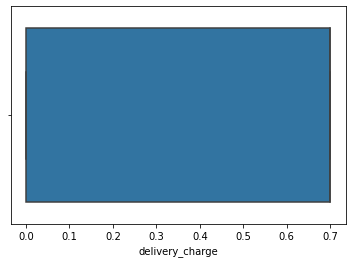

In [ ]:
# Outlier Detection of the numeric variables using
# Boxplots
sns.boxplot(data = numeric_train
            ,x = 'delivery_charge')

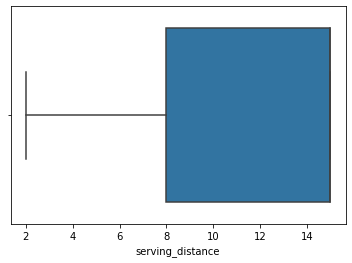

In [ ]:
sns.boxplot(data = numeric_train
            ,x = 'serving_distance')

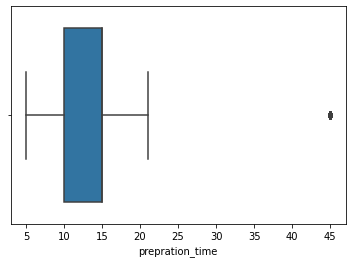

In [ ]:
sns.boxplot(data = numeric_train
            ,x = 'prepration_time')

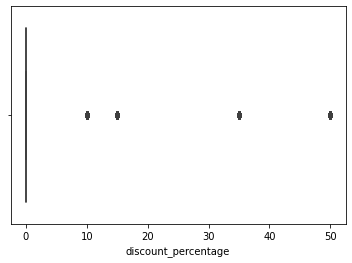

In [ ]:
sns.boxplot(data = numeric_train
            ,x = 'discount_percentage')

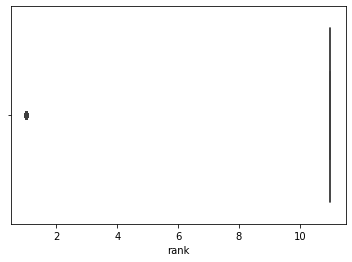

In [ ]:
sns.boxplot(data = numeric_train
            ,x = 'rank')

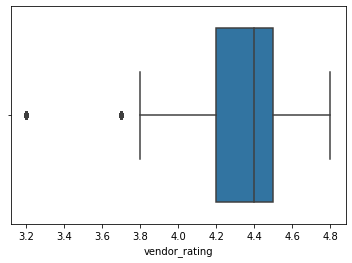

In [ ]:
sns.boxplot(data = numeric_train
            ,x = 'vendor_rating')

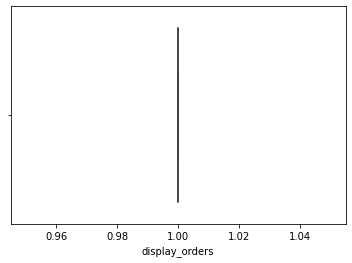

In [ ]:
sns.boxplot(data = numeric_train
            ,x = 'display_orders')

We will not drop the outliers as they are important in our study

In [ ]:
## Reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
# reduce cleaned merged train memory usage
train = reduce_mem_usage(train, verbose=1)

Mem. usage decreased to 802.37 Mb (0.0% reduction)


In [ ]:
train.shape

(5802400, 36)

## EDA


### Univariate Analysis

#### Statistical Summary of Numerical Variables


In [ ]:
#statistical summary of numerical variables

round(numeric_train.describe(),2)

,delivery_charge,serving_distance,prepration_time,discount_percentage,rank,vendor_rating,display_orders
count,5802400.0,5802400.00,5802400.00,5802400.00,5802400.00,5802400.0,5802400.0
mean,NaN,11.75,14.03,1.10,9.90,NaN,1.0
std,0.0,4.09,4.30,6.27,3.13,0.0,0.0
min,0.0,2.00,5.00,0.00,1.00,3.2,1.0
25%,0.0,8.00,10.00,0.00,11.00,4.2,1.0
50%,0.7,15.00,15.00,0.00,11.00,4.4,1.0
75%,0.7,15.00,15.00,0.00,11.00,4.5,1.0
max,0.7,15.00,45.00,50.00,11.00,4.8,1.0


Why NaN? Do we have any missing values? We will check below.

On average the service distance was 11.75, the minimum being 2 and maximum 15.

The mean preparation time was 14.03 minutes with the max prep time = 45 minutes.

Mean percent discount was really low at 1.10% but the maximum was as high as 50%. 25%, 50% and 75% were all zeros. Given that the max value was 50%, it indicates presence of outliers.

The highest vendor rating was 4.8.

All the displayed orders were just 1.


In [ ]:
# checking for missing values of numerical variables
numeric_train.isnull().sum()

delivery_charge        0
serving_distance       0
prepration_time        0
discount_percentage    0
rank                   0
vendor_rating          0
display_orders         0
dtype: int64

In [ ]:
numeric_train.columns

Index(['delivery_charge', 'serving_distance', 'prepration_time',
       'discount_percentage', 'rank', 'vendor_rating', 'display_orders'],
      dtype='object')

#### Distribution Plots of Numerical Variables


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

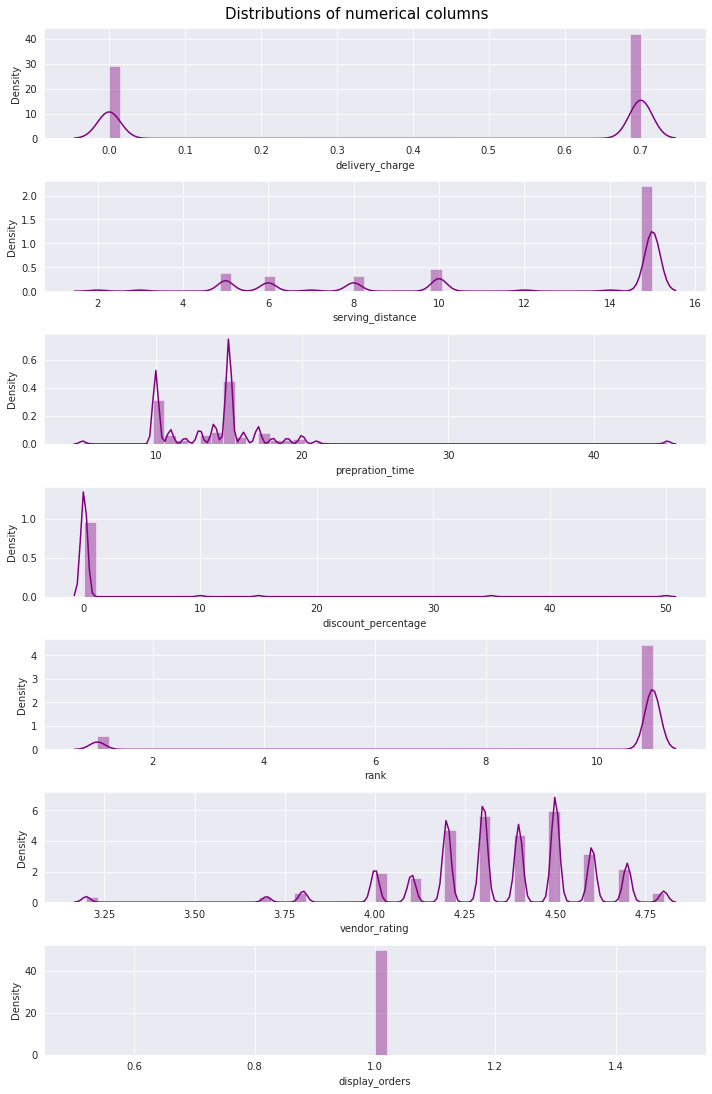

In [ ]:
dist_columns = ['delivery_charge', 'serving_distance', 'prepration_time',
       'discount_percentage', 'rank', 'vendor_rating', 'display_orders']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(dist_columns), figsize = (10, 15))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), numeric_train, dist_columns):
  sns.distplot(numeric_train[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

Delivery charge showed a bimodal distribution with 0.7 delivery charge having a bigger area. This indicates that 0.7 delivery charge was common compared to 0.0.

Service distance showed a multi-nomial distribution, with the biggest density at around 15. 

As for discount percentage majority of the values were concentrated at zero, but there were a few values at 10, 15, 35 and 50 percent. Another evidence for outliers.

The rank column showed a bimodal distribution with values at 1 and 11. There were more observations at 11.

We had multi-nomial distribution of vendor ratings, with the least rating at around 3.25 and the highest at more than 4.75.

All the displayed orders were just one.



#### Bar Charts to Show the distribution of categorical Variables

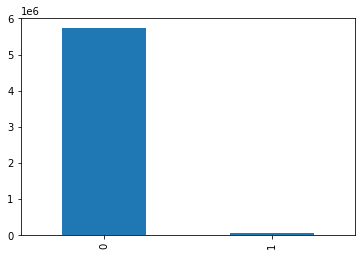

In [ ]:
train['target'].value_counts().plot.bar()

The plot shows our data being highly imbalanced with majority of the values at zero. Zero indicates the customer did not order from the vendor given the location and order history. 

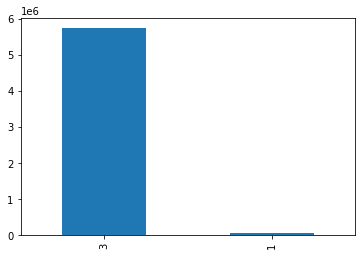

In [ ]:
train['device_type'].value_counts().plot.bar()

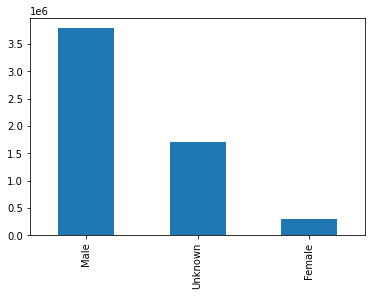

In [ ]:
train['gender'].value_counts().plot.bar()

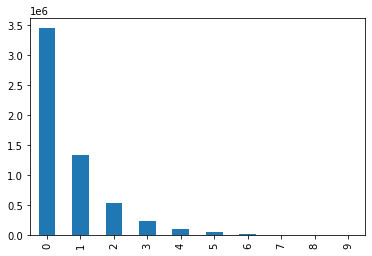

In [ ]:
train['location_number'].value_counts().head(10).plot.bar()

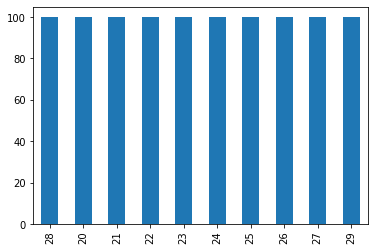

In [ ]:
train['location_number'].value_counts().tail(10).plot.bar()

In [ ]:
train['location_number'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int8)

In [ ]:
train.columns

Index(['akeed_customer_id', 'gender', 'status_x', 'verified_x', 'created_at_x',
       'updated_at_x', 'location_number', 'latitude_x', 'longitude_x', 'id',
       'authentication_id', 'latitude_y', 'longitude_y', 'vendor_category_en',
       'vendor_category_id', 'delivery_charge', 'serving_distance', 'is_open',
       'prepration_time', 'is_akeed_delivering', 'discount_percentage',
       'status_y', 'verified_y', 'rank', 'vendor_rating', 'city_id',
       'created_at_y', 'updated_at_y', 'device_type', 'display_orders',
       'CID X LOC_NUM X VENDOR', 'target', 'Open', 'Close', 'Open2', 'Close2'],
      dtype='object')

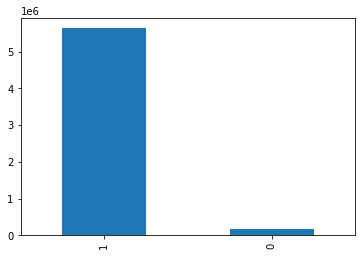

In [ ]:
train['verified_x'].value_counts().head(10).plot.bar()

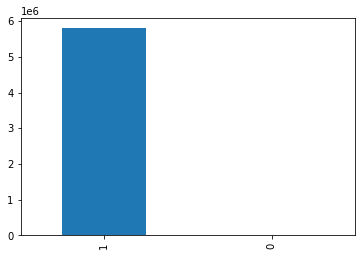

In [ ]:
train['status_x'].value_counts().head(10).plot.bar()

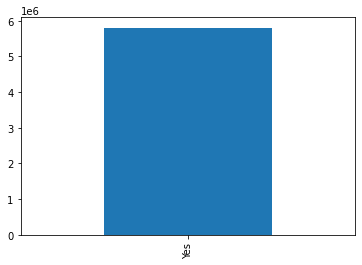

In [ ]:
train['is_akeed_delivering'].value_counts().head(10).plot.bar()

In [ ]:
# Histograms from numerical variables
# barplots for numerical varaiables

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# save file in drive
# train_clv.to_csv('/content/drive/My Drive/Akeed Recommendation Files/merged_train.csv', index =False)

In [ ]:
# merge test customer locations and vendors table and create a cartesian product
#
# test_clv = test_customer_locations.assign(key=1).merge(vendors.assign(key=1), on='key').drop('key',axis=1)
# test_clv.head(5)

,akeed_customer_id,gender,dob,status_x,verified_x,language_x,created_at_x,updated_at_x,customer_id,location_number,location_type,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,language_y,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders
0,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0,NaN,-96.407538,-67.197291,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1
1,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0,NaN,-96.407538,-67.197291,13,118608.0,-0.471654,0.744470,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,-,14,0.0,Yes,0.0,1.0,1,11,EN,4.7,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1
2,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0,NaN,-96.407538,-67.197291,20,118616.0,-0.407527,0.643681,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,-,19,0.0,Yes,0.0,1.0,1,1,EN,4.5,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,"{""primary_tags"":""71""}",1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1
3,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0,NaN,-96.407538,-67.197291,23,118619.0,-0.585385,0.753811,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,-,16,0.0,Yes,0.0,1.0,1,11,EN,4.5,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,"{""primary_tags"":""46""}",1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1
4,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0,NaN,-96.407538,-67.197291,28,118624.0,0.480602,0.552850,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,-,10,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,"{""primary_tags"":""32""}",1.0,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1


In [ ]:
# create new columns to use for merging
#
# test_clv['location_number_obj']=test_clv['location_number'].astype(str)
# test_clv['id_obj']=test_clv['id'].astype(str)

# # merge id, location number, and vendor id on test set
# #
# test_clv['CID X LOC_NUM X VENDOR'] = test_clv['customer_id'] +' X '+ test_clv['location_number_obj'] +' X '+ test_clv['id_obj']
# test_clv.head()

,akeed_customer_id,gender,dob,status_x,verified_x,language_x,created_at_x,updated_at_x,customer_id,location_number,location_type,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,language_y,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR
0,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0,NaN,-96.407538,-67.197291,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,0,4,ICE2DJP X 0 X 4
1,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0,NaN,-96.407538,-67.197291,13,118608.0,-0.471654,0.744470,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,-,14,0.0,Yes,0.0,1.0,1,11,EN,4.7,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1,0,13,ICE2DJP X 0 X 13
2,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0,NaN,-96.407538,-67.197291,20,118616.0,-0.407527,0.643681,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,-,19,0.0,Yes,0.0,1.0,1,1,EN,4.5,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,"{""primary_tags"":""71""}",1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1,0,20,ICE2DJP X 0 X 20
3,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0,NaN,-96.407538,-67.197291,23,118619.0,-0.585385,0.753811,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,-,16,0.0,Yes,0.0,1.0,1,11,EN,4.5,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,"{""primary_tags"":""46""}",1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1,0,23,ICE2DJP X 0 X 23
4,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0,NaN,-96.407538,-67.197291,28,118624.0,0.480602,0.552850,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,-,10,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,00:01:00,01:30:00,17:45:00,23:59:00,"{""primary_tags"":""32""

In [ ]:
# compare test and sample submission file
# print(test_clv.shape, sample_submission.shape)

(1631700, 75) (1672000, 2)


In [ ]:
# merge with sample submission to capture data in entirety
# test = pd.merge(test_clv, sample_submission, how='outer', on=['CID X LOC_NUM X VENDOR'])
# test.shape

(1672000, 76)

In [ ]:
# preview test set
# test.head()

,akeed_customer_id,gender,dob,status_x,verified_x,language_x,created_at_x,updated_at_x,customer_id,location_number,location_type,latitude_x,longitude_x,id,authentication_id,latitude_y,longitude_y,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_y,verified_y,rank,language_y,vendor_rating,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,ICE2DJP,Male,NaN,1.0,1.0,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0.0,NaN,-96.407538,-67.197291,4.0,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15.0,0.0,Yes,0.0,1.0,1.0,11.0,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3.0,1.0,0,4,ICE2DJP X 0 X 4,0
1,ICE2DJP,Male,NaN,1.0,1.0,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0.0,NaN,-96.407538,-67.197291,13.0,118608.0,-0.471654,0.744470,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,-,14.0,0.0,Yes,0.0,1.0,1.0,11.0,EN,4.7,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,19:30:00,00:00:00,01:30:00,08:00:00,23:59:00,00:00:00,01:30:00,08:00:00,23:59:00,"{""primary_tags"":""7""}",1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3.0,1.0,0,13,ICE2DJP X 0 X 13,0
2,ICE2DJP,Male,NaN,1.0,1.0,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0.0,NaN,-96.407538,-67.197291,20.0,118616.0,-0.407527,0.643681,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,-,19.0,0.0,Yes,0.0,1.0,1.0,1.0,EN,4.5,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,08:00:00,22:45:00,NaN,NaN,"{""primary_tags"":""71""}",1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3.0,1.0,0,20,ICE2DJP X 0 X 20,0
3,ICE2DJP,Male,NaN,1.0,1.0,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0.0,NaN,-96.407538,-67.197291,23.0,118619.0,-0.585385,0.753811,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,-,16.0,0.0,Yes,0.0,1.0,1.0,11.0,EN,4.5,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:30:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,09:00:00,23:45:00,NaN,NaN,"{""primary_tags"":""46""}",1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3.0,1.0,0,23,ICE2DJP X 0 X 23,0
4,ICE2DJP,Male,NaN,1.0,1.0,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,ICE2DJP,0.0,NaN,-96.407538,-67.197291,28.0,118624.0,0.480602,0.552850,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,-,10.0,0.0,Yes,0.0,1.0,1.0,11.0,EN,4.4,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59:00,00:01:00,00:30:00,11:00:00,23:59

In [ ]:
# drop the target column
# test.drop('target', axis=1, inplace =True)
# test.shape

(1672000, 75)

In [ ]:
# reduce test memory usage
# test_clv = reduce_mem_usage(test_clv, verbose=1)

Mem. usage decreased to 694.03 Mb (26.6% reduction)


In [ ]:
# save test file in drive
# test_clv.to_csv('/content/drive/My Drive/Akeed Recommendation Files/merged_test.csv', index =False)